In [7]:
split=1

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
color_dict = {"GENOT": "#317d01",
    "OTFM (eps=0)": "#a4fa6e",
    "cellOT": "#1099c7",
    "scGen": "#f2aa18",
    "CPA": "#6c0399",
    "chemCPA": "#e6b1fc",
    "biolord": "#54f0e5",
    "GEARS": "#f05c54",
             }


In [3]:
biolord_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/biolord"
id_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/identity"
chemcpa_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/results/chem"
genot_dir = None
otfm_dir = None
condot_dir = None

In [4]:
model_dirs = {"biolord": biolord_dir, "id": id_dir}

In [12]:
metrics_files = {"ood_encoded": f"ood_metrics_encoded_{str(split)}.csv", "ood_decoded": f"ood_metrics_decoded_{str(split)}.csv"}

In [14]:
dfs = {}
for model, model_dir in model_dirs.items():
    dfs[model] = pd.read_csv(os.path.join(model_dir, metrics_file), index_col=0)
    dfs[model]["model"] = model

TypeError: string indices must be integers, not 'str'

In [16]:
split =1
all_dfs = []
metrics_file = f"ood_metrics_decoded_{split}.csv"
dfs = {}
for model, model_dir in model_dirs.items():
    dfs[model] = pd.read_csv(os.path.join(model_dir, metrics_file), index_col=0)
    #dfs[model].loc["sinkhorn_div"] = dfs[model].loc[["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"]].mean(axis=0)
    if "sinkhorn_div_1" in dfs[model].index:
        dfs[model] = dfs[model].drop(["sinkhorn_div_1", "sinkhorn_div_10", "sinkhorn_div_100"])
    if "mmd_distance" in dfs[model].index:
        dfs[model] = dfs[model].drop(["mmd_distance"])
    if "mmd" in dfs[model].index:
        dfs[model] = dfs[model].drop(["mmd"])
    if "e_distance" in dfs[model].index:
        dfs[model] = dfs[model].drop(["e_distance"])
    dfs[model]["model"] = model
result_df = pd.concat(dfs.values(), ignore_index=False)
result_df["metric"] = result_df.index
metrics = result_df["metric"].unique()
df2 = pd.melt(result_df, id_vars=["model", "metric"])
df2["split"] = split
all_dfs.append(df2)

In [17]:
df_ood_metrics_decoded = pd.concat(all_dfs)


In [18]:
df_ood_metrics_decoded

,model,metric,variable,value,split
0,biolord,r_squared,A549_(+)-JQ1_10.0,0.989759,1
1,id,r_squared,A549_(+)-JQ1_10.0,0.988324,1
2,biolord,r_squared,A549_(+)-JQ1_100.0,0.963307,1
3,id,r_squared,A549_(+)-JQ1_100.0,0.958643,1
4,biolord,r_squared,A549_(+)-JQ1_1000.0,0.867155,1
...,...,...,...,...,...
1039,id,r_squared,MCF7_XAV-939_100.0,0.993501,1
1040,biolord,r_squared,MCF7_XAV-939_1000.0,0.994599,1
1041,id,r_squared,MCF7_XAV-939_1000.0,0.994054,1
1042,biolord,r_squared,MCF7_XAV-939_10000.0,0.984463,1


<Axes: xlabel='metric', ylabel='value'>

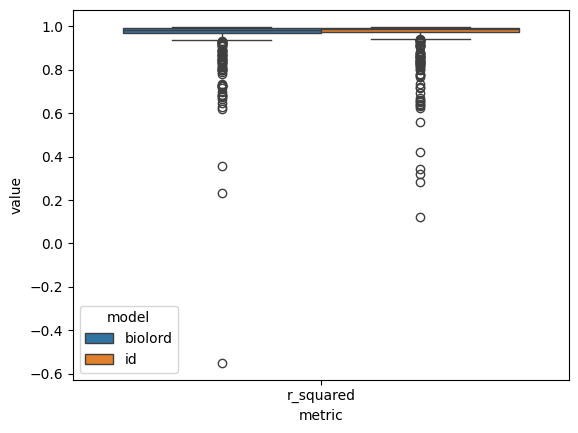

In [20]:
sns.boxplot(df_ood_metrics_decoded, x="metric", y="value", hue="model")

In [22]:
df_ood_metrics_decoded[["model", "value"]].groupby("model").mean()

,value
model,
biolord,0.956968
id,0.957961


In [ ]:
result_df = pd.concat(dfs.values(), ignore_index=False)
result_df["metric"] = result_df.index
metrics = result_df["metric"].unique()
df2 = pd.melt(result_df, id_vars=["model", "metric"])